In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format ='retina'

In [18]:
spot_move = [1.1,1.9,2.4,2.8,0.5,-2.4,0.1,-1.35]  
index = ['SX7E','SX5E','DAX','SPX','NDX','NKY','FTSE','HSCEI'] 
zipped = zip(index,spot_move)

index_dict = {i:[j,np.random.rand()*-1.5*j] for (i,j) in zipped}

In [19]:
df = pd.DataFrame(data=index_dict).T
df = df.rename(columns={0:'Spot Chg %',1:'ATMf Vol Chg'})

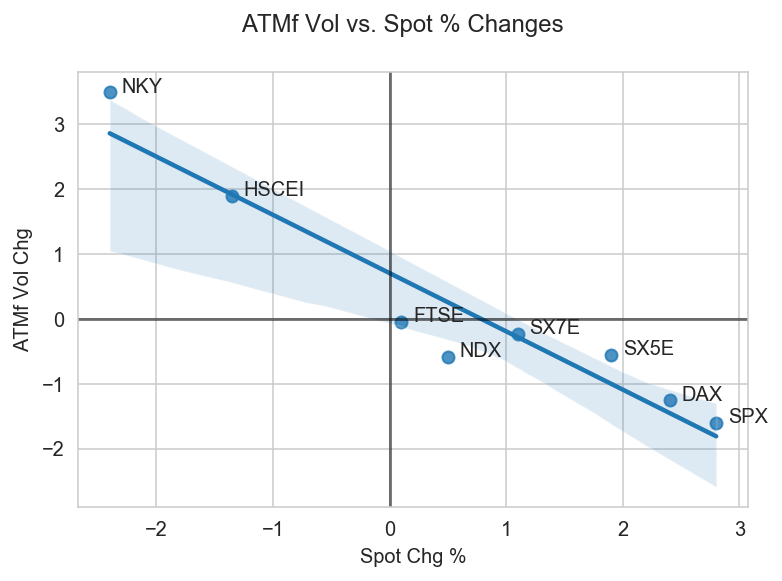

In [20]:
sns.set_style('whitegrid')
ax = sns.regplot(data=df,x='Spot Chg %',y='ATMf Vol Chg',x_jitter=False)
ax.axhline(0,color='black',alpha=0.5)
ax.axvline(0,color='black',alpha=0.5)
plt.suptitle('ATMf Vol vs. Spot % Changes')

for i, row in df.iterrows():
    ax.text(row['Spot Chg %']+0.1, row['ATMf Vol Chg'], str(i))
    
    

In [21]:
import statsmodels.api as sm
from sklearn import datasets
data = datasets.load_boston()

In [22]:
print(data.data.shape)
print(data.target.shape)

(506, 13)
(506,)


In [23]:
df = pd.DataFrame(data.data, columns = data.feature_names)
target = pd.DataFrame(data.target, columns = ['MEDV'])

In [26]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [31]:
#without a constant
X = df[['RM']]
y = target['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 15 Jul 2021   Prob (F-statistic):           2.49e-74
Time:                        07:38:42   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""